In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset

In [3]:
dataset='bone_tumor'

from loader import DataLoader
dl = DataLoader()
primitive_matrix, ground = dl.load_data(dataset=dataset)

In [4]:
#TODO formalize
train_primitive_matrix = primitive_matrix[0:400,:]
train_ground = ground[0:400]

val_primitive_matrix = primitive_matrix[400:600,:]
val_ground = ground[400:600]

## Simple Synthesis
Generate functions of cardinality 1/2/3, plot results of top 3-20

In [5]:
from heuristic_generator import HeuristicGenerator

In [16]:
validation_accuracy = []
training_accuracy = []
for i in range(3,18):
    hg = HeuristicGenerator(train_primitive_matrix, val_primitive_matrix, 
                            val_ground, train_ground, 0.6)
        
    hg.run_synthesizer(cardinality=3, keep=i)
    hg.run_verifier()
    
    va,ta = hg.evaluate()
    validation_accuracy.append(va)
    training_accuracy.append(ta)

Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2


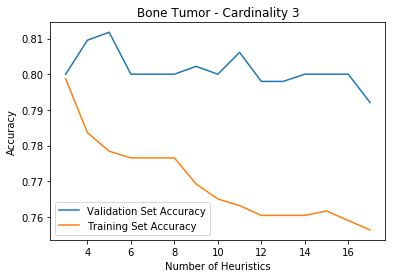

In [17]:
plt.plot(range(3,18),validation_accuracy)
plt.plot(range(3,18),training_accuracy)
plt.legend(['Validation Set Accuracy', 'Training Set Accuracy'])
plt.xlabel('Number of Heuristics')
plt.ylabel('Accuracy')
plt.title('Bone Tumor - Cardinality 3')

## Synthesis + Verification
Generate functions based on feedback from the verifier (vary cardinality)

In [31]:
validation_accuracy = []
training_accuracy = []
idx = None

hg = HeuristicGenerator(train_primitive_matrix, val_primitive_matrix, 
                            val_ground, train_ground, 0.6)
for i in range(3,18):
    if i == 3:
        hg.run_synthesizer(cardinality=3, idx=idx, keep=3)
    else:
        hg.run_synthesizer(cardinality=3, idx=idx, keep=1)
    hg.run_verifier()
    
    va,ta = hg.evaluate()
    validation_accuracy.append(va)
    training_accuracy.append(ta)
    
    hg.find_feedback(thresh=0.35)
    idx = hg.feedback_idx
    
    #print idx

Inferred cardinality: 2
In fb  (400, 3)
Inferred cardinality: 2
In fb  (400, 4)
Inferred cardinality: 2
In fb  (400, 5)
Inferred cardinality: 2
In fb  (400, 6)
Inferred cardinality: 2
In fb  (400, 7)
Inferred cardinality: 2
In fb  (400, 8)
Inferred cardinality: 2
In fb  (400, 9)
Inferred cardinality: 2
In fb  (400, 10)
Inferred cardinality: 2
In fb  (400, 11)
Inferred cardinality: 2
In fb  (400, 12)
Inferred cardinality: 2
In fb  (400, 13)
Inferred cardinality: 2
In fb  (400, 14)
Inferred cardinality: 2
In fb  (400, 15)
Inferred cardinality: 2
In fb  (400, 16)
Inferred cardinality: 2
In fb  (400, 17)


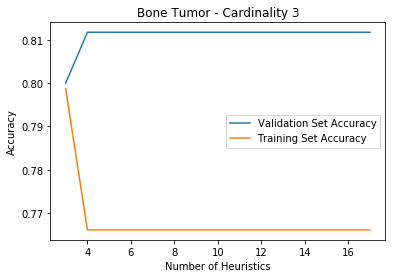

In [32]:
plt.plot(range(3,18),validation_accuracy)
plt.plot(range(3,18),training_accuracy)
plt.legend(['Validation Set Accuracy', 'Training Set Accuracy'])
plt.xlabel('Number of Heuristics')
plt.ylabel('Accuracy')
plt.title('Bone Tumor - Cardinality 3')